# <font color='#28B463'>DELTA RULE

<br>

## <font color='#28B463'>Introduction

<br>
It only took a few years until Bernard Widrow and his doctoral student Tedd Hoff proposed the idea of the Adaptive Linear Neuron (adaline). In contrast to the perceptron rule, <b>the delta rule of the adaline updates the weights based on a linear activation function</b> rather than a unit step function; here, this linear activation function is simply the identity function of the net input.

<br>
Shortly, we will see how this linear activation is an improvement over the perceptron and where the name "delta rule" comes from.


<br>
<table>
    <tr>
        <td width='40%' bgcolor='white'>
            <a id='perceptron_rule'>
                <img src="images/learning_algorithms_perceptron_rule.png" alt="perceptron rule">
            </a>
        </td>
        <td width='40%' bgcolor='white'>
            <a id='adaline_rule'>
                <img src="images/learning_algorithms_adaline_rule.png" alt="adaline rule">
            </a>
        </td>
    </tr>
</table>

<br>
<b>Being a continuous function</b>, one of the biggest advantages of the linear activation function over the unit step function is that <b>it is differentiable</b>; <b>this property allows us to define a cost function $ \operatorname{J}(w) $ that we can minimize in order to update our weights</b>. In the case of the linear activation function, one common error metric that will turn out to be especially convenient is (half) the sum of squared errors :

<br>
$
    \quad
    \begin{align}
        \operatorname{J}(w) = \dfrac{1}{2} \ \sum (\text{target}^{(i)} - \text{output}^{(i)})^2
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad & [\textbf{E2}]
    \end{align}
$

<br>
Here we characterize the cost function explicitly as a function of the weights; of course it also depends on the particular set of training examples, but these are assumed to remain fixed during training. <b>In order to minimize the cost function we will use gradient descent</b>, a simple yet powerful iterative algorithm that is often used in machine learning to find the local minimum of differentiable functions.


### <font color='#28B463'>Hypothesis Space

<br>
To grasp a first intuition of the gradient descent algorithm, it is helpful to visualize the entire hypothesis space of possible weight vectors and the associated values of the cost function, as illustrated in the picture below.


<br>
<a id='delta_rule_hypothesis_space'>
    <img src="images/delta_rule_hypothesis_space.png" alt="hypothesis space" width="40%" height="40%">
</a>

<br>
<ul style="list-style-type:square">
    <li>
        the axes $ w_o $ and $ w_1 $ represent possible values for the two weights of a simple linear unit
    </li>
    <br>
    <li>
        the plane defined by the intersection of these two axes represents the entire hypothesis space
    </li>
    <br>
    <li>
        the vertical axis indicates the value of the cost function relative to some training data set
    </li>
</ul>


<br>
Given the particular error metric we chosed to use, for linear units the error surface will always be parabolic with a single global minimum; the specific parabola will depend, of course, on the specific set of training examples. 


## <font color='#28B463'>Gradient Descent

<br>
<b>Gradient descent</b>, also known as steepest descent, <b>is a first-order iterative optimization algorithm for finding the minimum of a function</b>. 

<br>
It is based on the observation that if the function $ \operatorname{J}(w) $ is defined and differentiable in a neighborhood of a point $ w_o $, then <b>the function itself will decrease fastest if we move in the direction of the negative gradient</b> at that point ($ \ - \nabla \operatorname{J}(w_0) \ $). The step size is determined by the slope of the gradient as well as the value of a parameter called learning rate :

$
    \quad
    \begin{align}
        w_j \leftarrow w_j + \Delta w_j
        \qquad \text{where} \quad \Delta w_j = - \eta \ \dfrac{\partial \ J}{\partial \ w_j}
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad & [\textbf{E3}] 
    \end{align}
$

Gradient descent search determines a weight vector that minimizes the training error by starting with an arbitrary initial weight vector, then repeatedly modifying it in small steps. At each step, the weight vector is altered in the direction that produces the steepest descent along the error surface depicted in the picture above. This process continues until the global minimum error is reached.

### <font color='#28B463'>Derivation

<br>
How can we calculate the direction of steepest descent along the error surface? This direction can be found by computing the derivative of the cost function with respect to each component of the weights vector, also known as the gradient :

<br>
$
    \quad
    \begin{align}
        \nabla \operatorname{J}(w) \quad = \quad 
        \left[ 
            \frac{\partial \ \operatorname{J}}{\partial \ w_0} \ , \
            \frac{\partial \ \operatorname{J}}{\partial \ w_1} \ , \
            \cdots \ , \
            \frac{\partial \ \operatorname{J}}{\partial \ w_p}
        \right]
    \end{align}
$

<br>
As we can see, this gradient itself is a vector, whose components are the partial derivatives of $ \operatorname{J} $. When interpreted as a vector in the weight space, the gradient specifies the direction that produces the steepest increase in
the function, and the negative of this vector therefore gives the direction of steepest decrease.


<br>
$
    \quad
    \begin{align}
         \frac{\partial \ J}{\partial \ w_j} 
         &= 
             \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad
             & \text{by } \textbf{E2}
         \newline
         &= \frac{\partial }{\partial \ w_j} \ \frac{1}{2} \ \sum_i \ (target^{(i)} - output^{(i)})^2 
         \newline
         &= 
             \frac{1}{2} \ \sum_i \ 2 \ (target^{(i)} - output^{(i)}) \ 
             \frac{\partial}{\partial \ w_j} \ (target^{(i)} - output^{(i)})
         \newline
         &= 
             \sum_i \ (target^{(i)} - output^{(i)}) \ 
             \frac{\partial}{\partial \ w_j} \ \bigg(target^{(i)} - \sum_j w_j x^{(i)}_{j} \bigg) 
             & \text{the output of (identity) linear activation is } w \cdot x
         \newline
         &=  \sum_i \ (target^{(i)} - output^{(i)}) \ (-x^{(i)}_{j})
             & [\textbf{E4}] 
    \end{align}
$


<br>
We now have an equation for the partial derivative of the cost function in terms of the inputs, outputs, and target values associated with the training examples. If we plug this result back into <b>E3</b>, we obtain the weight update rule for gradient descent :

<br>
$
    \quad
    \begin{align}
        \Delta w_j 
        &= 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad & \text{by } \textbf{E3}
        \newline
        &= 
            - \ \eta \ \frac{\partial \ J}{\partial \ w_j} 
            & \text{by } \textbf{E4}
        \newline
        &= - \ \eta \ \sum_i \ (target^{(i)} - output^{(i)}) \ (- x^{(i)}_{j}) 
        \newline
        &= 
            \eta \ \sum_i \ (target^{(i)} - output^{(i)}) \ x^{(i)}_{j}
            & [\textbf{E5}] 
    \end{align}    
$

Eventually, we can apply a simultaneous weight update similarly to what we do in the perceptron rule ($ w \leftarrow w + \Delta w $). <b>Although the learning algorithm above may look identical to the perceptron rule, we shall note the two main differences </b>:

<ul style="list-style-type:square">
    <li>
        <b>the output of a linear activation function is a real number</b>, and not a class label as in the perceptron rule
    </li>
    <br>
    <li>
        <b>at each iteration of gradient descent the weight update is executed only after a calculation based on all samples in
        the training set</b>, instead of updating the weights incrementally after each sample; this is the reason is also called
        "batch" gradient descent
    </li>
</ul>

### <font color='#28B463'>Convergence

<br>
Because the error surface contains only a single global minimum, <b>gradient descent will converge to a weight vector with minimum error, regardless of whether the training examples are linearly separable, given a sufficiently small learning rate</b> $ \eta $ is used :

<br>
<ul style="list-style-type:square">
    <li>
        if the learning rate is too small, the algorithm will require a large number of iterations (or "epochs") to converge and
        can become trapped in local minima more easily
    </li>
    <br>
    <li>
        on the other hand, if the learning rate is too large, the gradient descent search runs the risk of overstepping the
        minimum in the error surface rather than settling into it; in this case, it will rapidly diverge as well
    </li>
</ul>


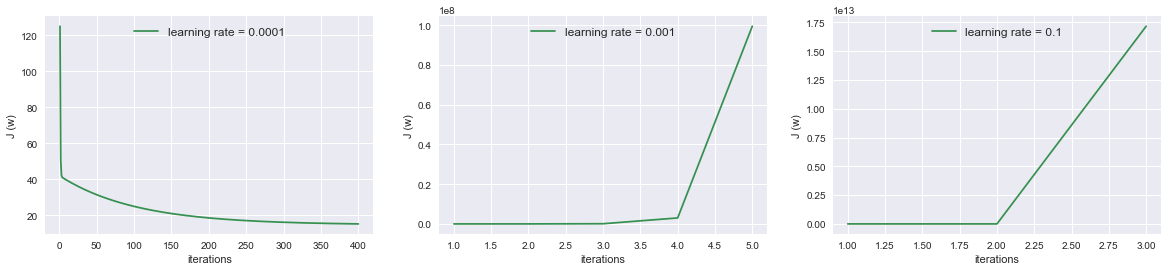

In [1]:
import artificial_neural_networks as ann
ann.plot_adaline_convergence(cmd = 'learning_rate')

<br>
For these reasons, one common modification to the gradient descent learing algorithm is to gradually reduce the value of $ \eta $ as the number of iterations grows.


<br>
Gradient descent is also a good example of why feature scaling is important for many machine learning algorithms. It is not only easier to find an appropriate learning rate if the features are on the same scale, but it also often leads to faster convergence and can prevent the weights from becoming too small (numerical stability).

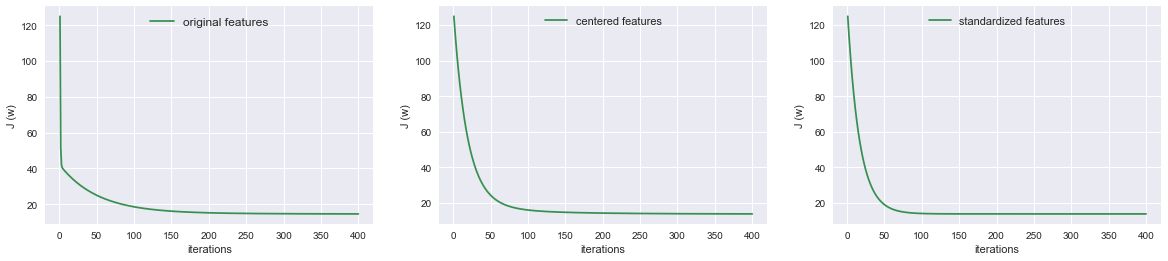

In [2]:
ann.plot_adaline_convergence(cmd = 'feature_scaling')

## <font color='#28B463'>Stochastic Gradient Descent

<br>
Gradient descent is an general learning paradigm that can be used to search through a large (or infinite) hypothesis space whenever the latter meets two conditions : it contains continuously parameterized hypotheses (e.g. the weights in a linear unit), and the error can be differentiated with respect to these hypothesis parameters. 

<br>
The key practical difficulties in applying gradient descent are :  

<ul style="list-style-type:square">
    <li>
        converging to a local minimum can sometimes be quite slow (many thousands of gradient descent steps)
    </li>
    <br>
    <li>
        in case of multiple local minima in the error surface, there is no guarantee that the procedure will find the global
        minimum
    </li>
</ul>

<br>
One common variation on gradient descent intended to alleviate these difficulties is called stochastic (or incremental) gradient
descent. If we think back to the perceptron rule, we remember that it performs the weight update incrementally after each individual training sample; this approach is called "online" learning, and it is also how Adaline was first described. 

<br>
Whereas the gradient descent training rule presented in <b>E5</b> computes weight updates after summing over all the training examples, <b>the idea behind stochastic gradient descent is to approximate this gradient descent search by updating weights incrementally, following the calculation of the error for each individual example</b> :

<br>
$
    \quad
    \begin{align}
        \Delta w_j^{(i)} 
        &= 
            \eta \ (target^{(i)} - output^{(i)}) \ x^{(i)}_{j}
            \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
            \qquad \qquad \qquad \qquad \qquad \quad & [\textbf{E6}] 
        \newline
    \end{align}    
$

<br>
At each iteration a distinct cost function is defined for that specific training example, and the weights are altered according to the gradient of these new error function; <b>the sequence of these weight updates, when iterated over all training examples, provides a reasonable approximation to descending the gradient with respect to the original cost function</b> (<b>E2</b>) :

<br>
$
    \quad
    \begin{align}
        \operatorname{J}(w)^{(i)} &= \dfrac{1}{2} \ (\text{target}^{(i)} - \text{output}^{(i)})^2
        \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad 
        \qquad \qquad \qquad \qquad \qquad \qquad & [\textbf{E7}] 
    \end{align}
$

<br>
Although stochastic gradient descent might sound inferior to gradient descent due its "stochastic" nature and the "approximated" gradient, <b>given a sufficiently small learning rate stochastic gradient descent can be made to approximate true gradient descent arbitrarily closely</b>.


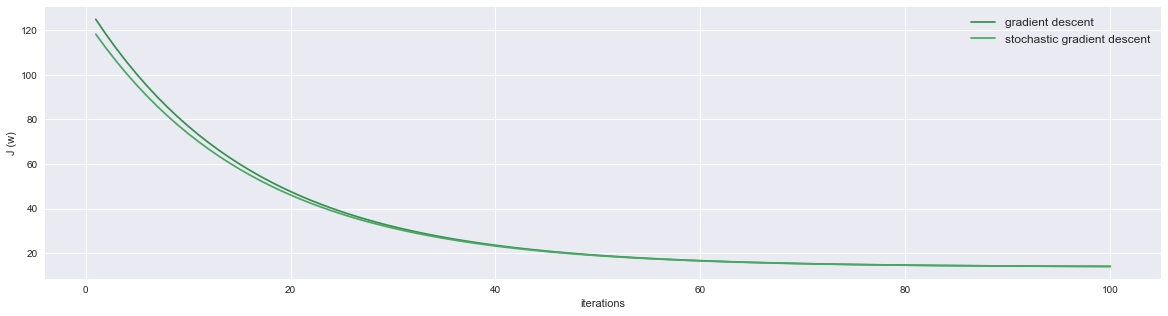

In [3]:
ann.plot_adaline_convergence(cmd = 'stochastic_gradient_descent')

<br>
The <b>fundamental differences</b> between standard (batch) and stochastic gradient descent are the following :

<br>

<ul style="list-style-type:square">
    <li>
        in standard gradient descent, the error is summed over all examples before updating weights, whereas in stochastic
        gradient descent weights are updated upon examining each training example
    </li>
    <br>
    <li>
        because it uses the true gradient, standard gradient descent is often used with a larger step size per weight update
        than stochastic gradient descent
    </li>    
    <br>
    <li>
        <b>stochastic gradient descent often converges much faster than gradient descent</b>, since the updates are applied
        immediately after each training sample; the former is computationally more efficient, especially for very large datasets
    </li>
    <br>
    <li>
        in case of multiple local minima in <b>E2</b>, <b>stochastic gradient descent can sometimes avoid falling into these
        local minima because it uses a distinct gradients for each training example</bb> (<b>E7</b>) to guide its search
    </li>
</ul>

<br>
Another advantage of online learning is that the classifier can be immediately updated as new training data arrives; in web applications, for example, old training data can be discarded if storage is an issue. In large-scale machine learning systems, it is also common practice to use so-called "mini-batches", a compromise with smoother convergence than stochastic gradient descent.


## <font color='#28B463'>Considerations

<br>
In the last notebooks we have considered two similar algorithms for iteratively learning the weights of a single neuron. The key difference between these algorithms is that the perceptron training rule updates weights based on the error in the thresholded perceptron output, whereas the delta rule updates weights based on the error in the unthresholded linear combination of inputs.

<br>
The difference between these two training rules is reflected in different convergence properties. The perceptron training rule converges after a finite number of iterations to a hypothesis that perfectly classifies the training data, provided the
training examples are linearly separable. The delta rule converges only asymptotically toward the minimum error hypothesis, possibly requiring unbounded time, but converges regardless of whether the training data are linearly separable.


## <font color='#28B463'>References

<br>
<ul style="list-style-type:square">
    <li>
        Tom Mitchell - Machine Learning <br>
        http://www.cs.ubbcluj.ro/~gabis/ml/ml-books/McGrawHill%20-%20Machine%20Learning%20-Tom%20Mitchell.pdf
    </li>
    <br>
    <li>
        Sebastian Raschka - Single Layer Neural Networks and Gradient Descent <br>
        http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html#the-perceptron-learning-rule
    </li>
    <br>
    <li>
        Wikipedia - Gradient Descent <br>
        https://en.wikipedia.org/wiki/Gradient_descent
    </li>
</ul>
